<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/DS_L2_17_Apr_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [14]:
!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv

--2020-04-17 19:26:49--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156066 (152K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 152.41K  --.-KB/s    in 0.04s   

2020-04-17 19:26:49 (3.85 MB/s) - ‘train.csv’ saved [156066/156066]



In [15]:
!wget https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv

--2020-04-17 19:26:52--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158678 (155K) [text/plain]
Saving to: ‘moviesData.csv’

moviesData.csv      100%[===================>] 154.96K  --.-KB/s    in 0.04s   

2020-04-17 19:26:53 (3.68 MB/s) - ‘moviesData.csv’ saved [158678/158678]



In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv",error_bad_lines=False)
movies=pd.read_csv("moviesData.csv",error_bad_lines=False)

In [18]:
# Print the first ten rows of df
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [20]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'][0:5]

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [21]:
# Find the details of MonthlyRate 
df["MonthlyRate"].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [34]:
# Check for missing values 
print(df.isna().sum())

# Drop the missing values 


# Print the size of df after dropping 

print("\n"+"Shape is:"+str(df.shape))

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew']=df['MonthlyRate']/df['MonthlyRate'].std()

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [53]:
# Check for missing values 
print(movies.isna().sum())
print("Size before dropping:"+str(movies.shape))
# Drop the missing values 
print("Size after dropping:"+str(movies.dropna().shape))
# Replace the missing values 
# You can use SimpleImputer of sklearn for this
from sklearn.impute import SimpleImputer

imr = SimpleImputer(strategy='median')
imr = imr.fit(movies[['runtime','dvd_rel_year','dvd_rel_month','dvd_rel_day']])
movies[['runtime','dvd_rel_year','dvd_rel_month','dvd_rel_day']] = imr.transform(movies[['runtime','dvd_rel_year','dvd_rel_month','dvd_rel_day']])

imr2 = SimpleImputer(strategy='most_frequent')
imr2 = imr2.fit(movies[['director','actor1','actor2','actor3','actor4','actor5','studio']])
movies[['director','actor1','actor2','actor3','actor4','actor5','studio']] = imr2.transform(movies[['director','actor1','actor2','actor3','actor4','actor5','studio']])


print(movies.isna().sum())

Unnamed: 0          0
title               0
title_type          0
genre               0
runtime             0
mpaa_rating         0
studio              0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
dvd_rel_year        0
dvd_rel_month       0
dvd_rel_day         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
director            2
actor1              0
actor2              0
actor3              0
actor4              0
actor5              0
dtype: int64
Size before dropping:(600, 31)
Size after dropping:(598, 31)
Unnamed: 0          0
title               0
title_type          0
genre               0
runtime             0
mpaa_rating         0
studio              0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
dvd_rel_year        0
dv

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

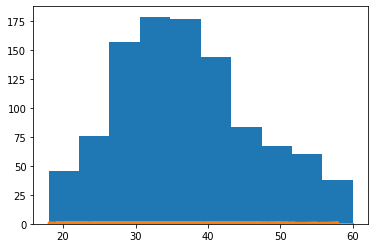

In [55]:
# Plot and modify the histogram of Age

plt.hist(df['Age'])
# Draw a scatter plot between Age and Attrition



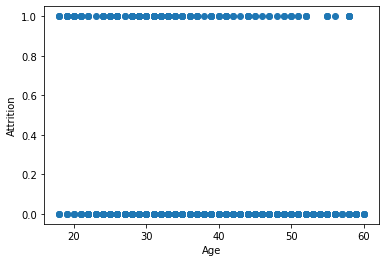

In [58]:
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.scatter(df['Age'],df['Attrition'])


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


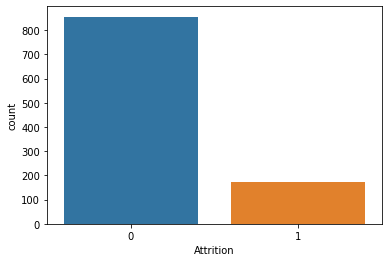

In [74]:
# Get a series of counts of values of Attrition
countsAttrition=df['Attrition'].value_counts()
print(countsAttrition)
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(x="Attrition",data=df)


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

In [89]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
crossTab=pd.crosstab(df.Attrition,df.BusinessTravel)
crossTab.idxmax(axis=1)

Attrition
0    Travel_Rarely
1    Travel_Rarely
dtype: object

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

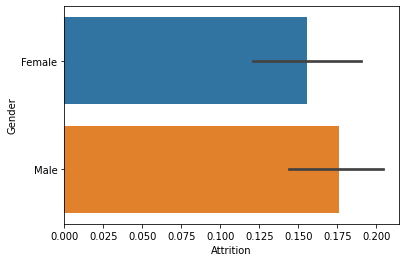

In [90]:
# Draw a stacked bar chart between Attrition and Gender 


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

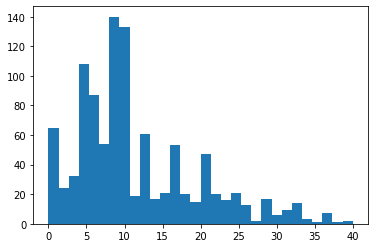

In [93]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.ylabel("Count")
plt.xlabel("Total Working Years")

plt.hist(df['TotalWorkingYears'],bins=30)

# Draw a histogram of YearsAtCompany


(array([156.,  84.,  93., 202.,  57.,  62., 121.,  78.,  23.,  24.,  10.,
         12.,  16.,  11.,   9.,  31.,   9.,   0.,  10.,   3.,   2.,   2.,
          0.,   3.,   6.,   1.,   0.,   2.,   0.,   1.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

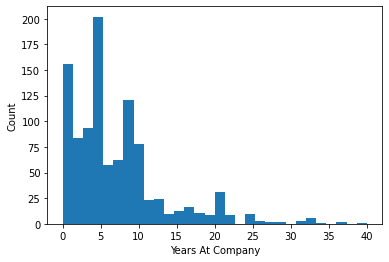

In [95]:
plt.ylabel("Count")
plt.xlabel("Years At Company")
plt.hist(df['YearsAtCompany'],bins=30)

It is right skewed.

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


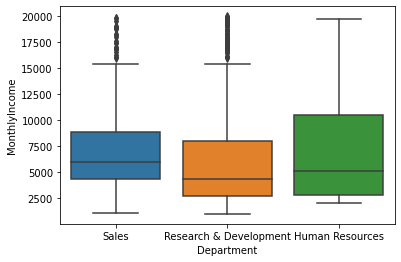

In [96]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
sns.boxplot(y=df['MonthlyIncome'],x=df['Department'])


Yes there are outlier for Sales and R&D Department


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Highest portion of the pie chart: Sales Executive


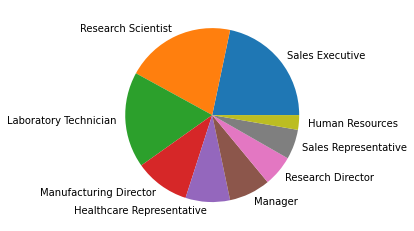

In [103]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 

plt.pie(df['JobRole'].value_counts(),labels=df['JobRole'].value_counts().index)
print("Highest portion of the pie chart:",df['JobRole'].value_counts().idxmax())